Во-первых, подключаем нужные нам библиотеки numpy, scipy.stats и matplotlib, а также импортируем из библиотеки math функцию factorial, которая понадобится нам позднее.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from math import factorial

Определяем параметры нашей выборки: N - размер, $\theta$ - параметр экспоненциального распределения (в коде обозначен, как t). Далее генерируем выборку и определяем k - массив заданного размера m значений параметра нашей оценки.

In [11]:
n = 10000
t = 1
sample = sps.expon.rvs(size=n, scale=1/t)
arr = np.arange(0, n, 1)

Задаём evaluation, как функцию модуля разности оценки и истинного значения $\theta$ в зависимости от $n\le N$. Параметром данной функции является параметр оценки $$\sqrt[k]{\frac{k!}{\bar{X}^k}}$$.

In [42]:
def evaluation(x):
    eval = np.zeros(n)
    for i in range(1, n):
        eval[i] = abs((factorial(x) / np.mean((sample[0:i]) ** x)) ** (1 / x) - 1 / t)
    return eval

Теперь строим график функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n\le N$ при различных значениях k. При k = 1..10:

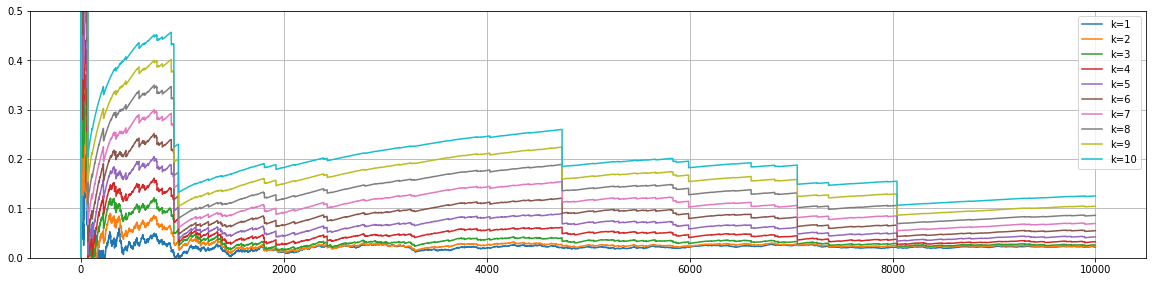

In [46]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.ylim(0, 0.5)
plt.plot(arr, evaluation(1), label='k=1')
plt.plot(arr, evaluation(2), label='k=2')
plt.plot(arr, evaluation(3), label='k=3')
plt.plot(arr, evaluation(4), label='k=4')
plt.plot(arr, evaluation(5), label='k=5')
plt.plot(arr, evaluation(6), label='k=6')
plt.plot(arr, evaluation(7), label='k=7')
plt.plot(arr, evaluation(8), label='k=8')
plt.plot(arr, evaluation(9), label='k=9')
plt.plot(arr, evaluation(10), label='k=10')
plt.legend()
plt.grid()
plt.show()

Чтобы получить более точный результат, посчитаем значение модуля разности при n = N для выбранных нами значений k:

In [47]:
print(evaluation(1)[n - 1])
print(evaluation(2)[n - 1])
print(evaluation(3)[n - 1])
print(evaluation(4)[n - 1])
print(evaluation(5)[n - 1])
print(evaluation(6)[n - 1])
print(evaluation(7)[n - 1])
print(evaluation(8)[n - 1])
print(evaluation(9)[n - 1])
print(evaluation(10)[n - 1])

0.0218054304331
0.0231469758978
0.0258771282986
0.032317070426
0.0423188732875
0.0549111828086
0.0694728603738
0.085917153784
0.104419708802
0.125141412408


Построив графики для различных значений $\theta$ и посмотрев значения оценок при n = N, можно сделать вывод о том, что при k = 1 оценка получилась лучше (в смысле упомянутого модуля разности при n = N).